The documentation on how to use this API is found here: https://github.com/swar/nba_api

This is the website: https://www.nba.com/

In [1]:
!pip install nba_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2


In [6]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def one_dict(list_dict):
  keys=list_dict[0].keys()
  out_dict= {key:[] for key in keys}
  for dict_ in list_dict:
    for key, value in dict_.items():
      out_dict[key].append(value)
  return out_dict

In [7]:
#return a list of the dictionaries
nba_teams = teams.get_teams()

nba_teams[0]

{'id': 1610612737,
 'full_name': 'Atlanta Hawks',
 'abbreviation': 'ATL',
 'nickname': 'Hawks',
 'city': 'Atlanta',
 'state': 'Georgia',
 'year_founded': 1949}

We can observe that the profile details stored for each NBA team include the team's ID, full name, abbreviation, nickname, city, state, and year founded.

In [9]:
#converting the dictionary to a table using the one_dict function created
nba_teams_dict = one_dict(nba_teams)
df_teams=pd.DataFrame(nba_teams_dict)
df_teams.head(10)

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


In [14]:
#let's sort the dataframe bsed on the year founded
sorted_df_teams= df_teams.sort_values('year_founded')
sorted_df_teams.head(10)

,id,full_name,abbreviation,nickname,city,state,year_founded
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
15,1610612752,New York Knicks,NYK,Knicks,New York,New York,1946
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
28,1610612765,Detroit Pistons,DET,Pistons,Detroit,Michigan,1948
21,1610612758,Sacramento Kings,SAC,Kings,Sacramento,California,1948
10,1610612747,Los Angeles Lakers,LAL,Lakers,Los Angeles,California,1948
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
18,1610612755,Philadelphia 76ers,PHI,76ers,Philadelphia,Pennsylvania,1949
27,1610612764,Washington Wizards,WAS,Wizards,Washington,District of Columbia,1961
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [15]:
#lets's carry out some annalysis on the year_founded column
sorted_df_teams['year_founded'].describe()

count      30.000000
mean     1969.700000
std        16.698441
min      1946.000000
25%      1952.000000
50%      1970.000000
75%      1979.000000
max      2002.000000
Name: year_founded, dtype: float64

The oldest team was established in 1946 while the youngest 2002. Most teams were established between 1952 and 1979.

In [24]:
#let's find the youngest and the oldes teams
oldest_team= sorted_df_teams.iloc[0,1]
oldest_team_year= sorted_df_teams.iloc[0,6]

youngest_team = sorted_df_teams.iloc[-1,1]
youngest_team_year= sorted_df_teams.iloc[-1,6]

print(f'One of the oldest team in nba history is {oldest_team} which was established in {oldest_team_year}')
print(f'One of the recent teams in nba history as at June 2024 is {youngest_team} which was established in {youngest_team_year}')

One of the oldest team in nba history is Boston Celtics which was established in 1946
One of the recent teams in nba history as at June 2024 is New Orleans Pelicans which was established in 2002


In [30]:
#let's see some 5 games the Warriors played and how they faired
from nba_api.stats.endpoints import leaguegamefinder

df_warriors=sorted_df_teams[sorted_df_teams['nickname']=='Warriors']
id_warriors=df_warriors[['id']].values[0][0]

gamefinder= leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)
gamefinder.get_json()
gamefinder.get_data_frames()[0].head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,52023,1610612744,GSW,Golden State Warriors,0052300131,2024-04-16,GSW @ SAC,L,239,94,...,0.783,8.0,34.0,42.0,19,5,3,16,17,-24.0
1,22023,1610612744,GSW,Golden State Warriors,0022301198,2024-04-14,GSW vs. UTA,W,239,123,...,0.826,12.0,30.0,42.0,35,10,6,9,14,7.0
2,22023,1610612744,GSW,Golden State Warriors,0022301182,2024-04-12,GSW vs. NOP,L,240,109,...,0.762,11.0,42.0,53.0,27,6,5,16,15,-5.0
3,22023,1610612744,GSW,Golden State Warriors,0022301169,2024-04-11,GSW @ POR,W,240,100,...,0.800,10.0,36.0,46.0,24,8,13,16,18,8.0
4,22023,1610612744,GSW,Golden State Warriors,0022301155,2024-04-09,GSW @ LAL,W,241,134,...,0.667,4.0,38.0,42.0,37,3,12,15,17,14.0


we can see it contains information about all the games the Warriors played. The PLUS_MINUS column contains information on the score, if the value is negative, the Warriors lost by that many points, if the value is positive, the warriors won by that amount of points. The column MATCHUP has the team the Warriors were playing, GSW stands for Golden State Warriors. vs signifies it was a home game and the @ symbol means an away game.

In [35]:
import requests

filename= 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl'

def download(url,filename):
  response=requests.get(url)
  if response.status_code == 200:
    with open(filename,'wb') as f: #w means write and b means binary mode such as images; this means write binary mode
      f.write(response.content)

download(filename,'Golden_State.pkl')

file_name= 'Golden_State.pkl'
games= pd.read_pickle(file_name)
games.head()


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [38]:
#let's create two dataframes
#one for the games that warriors faced the raptors at home
#the second for away games
games_home= games[games['MATCHUP']== 'GSW vs. TOR']

games_home.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
8,42018,1610612744,GSW,Golden State Warriors,0041800406,2019-06-13,GSW vs. TOR,L,240,110,...,0.700,11.0,31.0,42.0,28,9.0,6,16.0,23,-4.0
10,42018,1610612744,GSW,Golden State Warriors,0041800404,2019-06-07,GSW vs. TOR,L,241,92,...,0.667,8.0,34.0,42.0,26,6.0,6,17.0,23,-13.0
11,42018,1610612744,GSW,Golden State Warriors,0041800403,2019-06-05,GSW vs. TOR,L,241,109,...,0.833,13.0,28.0,41.0,25,8.0,3,14.0,21,-14.0
83,22018,1610612744,GSW,Golden State Warriors,0021800415,2018-12-12,GSW vs. TOR,L,239,93,...,0.692,5.0,35.0,40.0,28,5.0,11,19.0,18,-20.0


In [37]:
games_away= games[games['MATCHUP']== 'GSW @ TOR']

games_away.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
9,42018,1610612744,GSW,Golden State Warriors,0041800405,2019-06-10,GSW @ TOR,W,240,106,...,0.714,6.0,31.0,37.0,27,5.0,7,15.0,22,1.0
12,42018,1610612744,GSW,Golden State Warriors,0041800402,2019-06-02,GSW @ TOR,W,240,109,...,0.870,6.0,36.0,42.0,34,7.0,5,15.0,26,5.0
13,42018,1610612744,GSW,Golden State Warriors,0041800401,2019-05-30,GSW @ TOR,L,239,109,...,0.935,9.0,29.0,38.0,29,6.0,2,16.0,27,-9.0
89,22018,1610612744,GSW,Golden State Warriors,0021800316,2018-11-29,GSW @ TOR,L,265,128,...,0.850,17.0,29.0,46.0,27,6.0,5,14.0,22,-3.0
184,22017,1610612744,GSW,Golden State Warriors,0021700631,2018-01-13,GSW @ TOR,W,239,127,...,0.857,3.0,27.0,30.0,28,4.0,3,6.0,20,2.0


In [44]:
#let's find the number of times these two have met at home to the warriors and away to the raptors
home_games_count= len(games_home)
away_games_count= len(games_away)

print(f'Total warriors home games against the raptors is {home_games_count}')
print(f'Total warriors away games against the raptors is {away_games_count}')

Total warriors home games against the raptors is 26
Total warriors away games against the raptors is 28


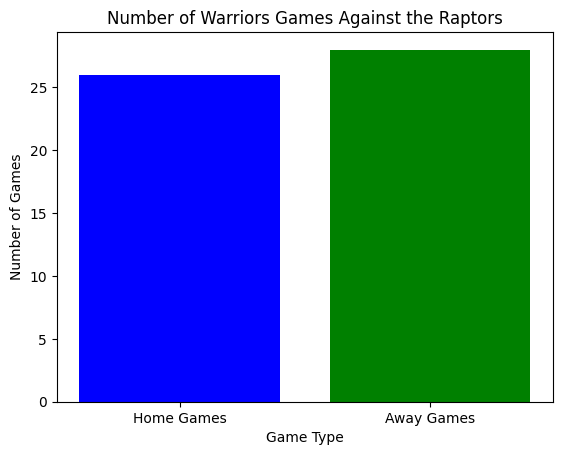

In [49]:
labels = ['Home Games', 'Away Games']
counts = [home_games_count, away_games_count]
plt.bar(labels, counts, color=['blue', 'green'])

plt.title('Number of Warriors Games Against the Raptors')
plt.xlabel('Game Type')
plt.ylabel('Number of Games')

plt.show()

In [41]:
#let's see how many wins GSW had against the raptors in their home and away games
games_home_wins= sum(games_home['WL']=='W')
games_home_loss= sum(games_home['WL']=='L')

games_away_wins= sum(games_away['WL']=='W')
games_away_loss= sum(games_away['WL']=='L')

print(f'The number of games the warriors won against the raptors at home is {games_home_wins} whereas the games lost is {games_home_loss}')
print(f'The number of away games the warriors won against the raptors is {games_away_wins} whereas the games lost is {games_away_loss}')

The number of games the warriors won against the raptors at home is 17 whereas the games lost is 9
The number of away games the warriors won against the raptors is 15 whereas the games lost is 13


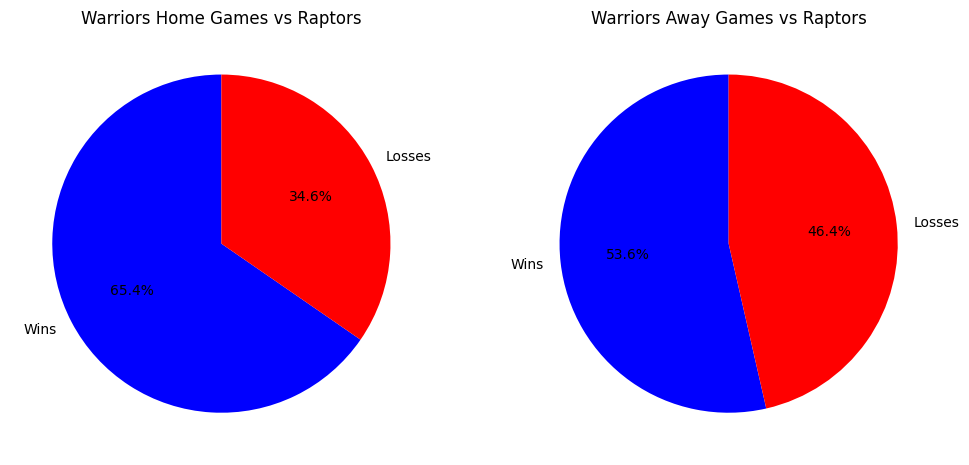

In [50]:
home_labels = ['Wins', 'Losses']
home_sizes = [games_home_wins, games_home_loss]
away_labels = ['Wins', 'Losses']
away_sizes = [games_away_wins, games_away_loss]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(home_sizes, labels=home_labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
ax1.set_title('Warriors Home Games vs Raptors')

ax2.pie(away_sizes, labels=away_labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
ax2.set_title('Warriors Away Games vs Raptors')

plt.show()

Generally, the warriors have a better chance of winning games at home when they play against the raptors.

In [43]:
#let's confirm whether the warriors are better than the raptors by finding the mean of the 'PLUS_MINUS' column
mean_home_points= games_home['PLUS_MINUS'].mean()
mean_away_points= games_away['PLUS_MINUS'].mean()

overall_mean_points= mean_home_points+mean_away_points

print(f'The average points at home against the raptors is {mean_home_points}')
print(f'The average away game points against the raptors is {mean_away_points}')
print(f'The overall points for the warriors against the raptors is {overall_mean_points}')

The average points at home against the raptors is 3.730769230769231
The average away game points against the raptors is -0.6071428571428571
The overall points for the warriors against the raptors is 3.1236263736263736


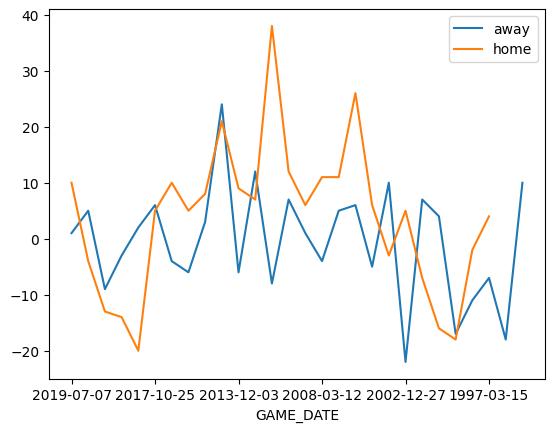

In [45]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

**Overal, the warriors are better than the raptors**

In [48]:
#checking the mean points of the warriors against the raptors
mean_home_points= games_home['PTS'].mean()
mean_away_points= games_away['PTS'].mean()

print('The mean home game points for the warriors against the raptors is', mean_home_points)
print('The mean away game points for the warriors against the raptors is', mean_away_points)

The mean home game points for the warriors against the raptors is 106.8076923076923
The mean away game points for the warriors against the raptors is 102.96428571428571
